# Test 1 - Plot

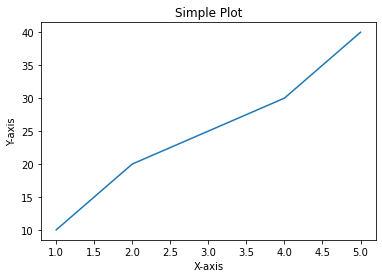

In [2]:
import matplotlib.pyplot as plt
# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]
# Create a line plot
plt.plot(x, y)
plt.title('Simple Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# Test 2 - Create a Dataframe

In [6]:
# %%timeit 

import pandas as pd

# Create a simple DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [24, 27, 22],
        'Location': ['New York', 'Los Angeles', 'Chicago']}
df = pd.DataFrame(data)

# Display the DataFrame
df

,Name,Age,Location
0,Alice,24,New York
1,Bob,27,Los Angeles
2,Charlie,22,Chicago


# Test 3 - Word Count (Without MapReduce)

In [7]:
from collections import Counter
import string
import matplotlib.pyplot as plt

in: 1
a: 4
faraway: 1
land: 1
there: 1
was: 3
peaceful: 1
village: 2
the: 3
villagers: 1
were: 1
kindhearted: 1
people: 1
who: 1
helped: 1
one: 2
another: 1
they: 1
lived: 1
simple: 1
lives: 1
and: 2
celebrated: 1
every: 1
day: 2
as: 1
if: 1
it: 1
special: 1
occasion: 1
but: 1
storm: 1
came: 1
peace: 1
of: 1
shattered: 1


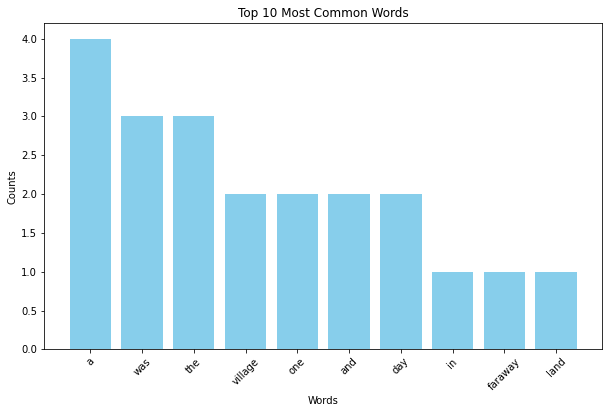

In [10]:
# %%timeit

# Step 1: Input the text (this could be replaced with a file input)
text = """
In a faraway land, there was a peaceful village. The villagers were kind-hearted people who helped one another. They lived simple lives and celebrated every day as if it was a special occasion. But one day, a storm came, and the peace of the village was shattered.
"""

# Step 2: Clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

cleaned_text = clean_text(text)

# Step 3: Split the text into words and count them
words = cleaned_text.split()
word_count = Counter(words)

# Step 4: Display the word counts
for word, count in word_count.items():
    print(f"{word}: {count}")

# Step 5: Visualize the word counts using a bar chart
# Sort by frequency for better visualization
most_common_words = word_count.most_common(10)  # Show top 10 words
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# Test 4 - Word Count (with MapReduce)

In [11]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
# Initialize Spark
spark = SparkSession.builder.appName("WordCount").getOrCreate()
sc = SparkContext.getOrCreate()

In [12]:
#%%timeit
# Step 1: Input Text
text = """
In a faraway land, there was a peaceful village. The villagers were kind-hearted
people who helped one another. They lived simple lives and celebrated every day as
if it was a special occasion. But one day, a storm came, and the peace of the
village was shattered.
"""
# Step 2: Parallelize the data (distribute across the cluster)
rdd = sc.parallelize(text.split())
# Step 3: Perform the word count in a distributed fashion
word_counts = rdd.map(lambda word: (word, 1)) \
.reduceByKey(lambda a, b: a + b)
# Step 4: Collect and display results
for word, count in word_counts.collect():
    print(f"{word}: {count}")
# Stop the Spark session
spark.stop()


land,: 1
there: 1
was: 3
The: 1
villagers: 1
kind-hearted: 1
another.: 1
They: 1
lived: 1
simple: 1
celebrated: 1
as: 1
occasion.: 1
But: 1
storm: 1
peace: 1
of: 1
In: 1
a: 4
faraway: 1
peaceful: 1
village.: 1
were: 1
people: 1
who: 1
helped: 1
one: 2
lives: 1
and: 2
every: 1
day: 1
if: 1
it: 1
special: 1
day,: 1
came,: 1
the: 2
village: 1
shattered.: 1


# Test 5 - Sorted Word Count (With MapReduce)

In [13]:
# Initialize Spark
spark = SparkSession.builder.appName("SortedWordCount").getOrCreate()
sc = SparkContext.getOrCreate()

In [14]:
# Step 1: Input Sentences - Sentences generated with Chat GPT
sentences = [
    "The sun set behind the mountains, casting a golden glow across the valley.",
    "She opened the book and found herself lost in a world of adventure and mystery.",
    "Every morning, he jogged through the park, enjoying the fresh air and chirping birds.",
    "The aroma of freshly baked bread filled the kitchen, making everyone's mouth water.",
    "As the storm rolled in, the sky darkened, and the first drops of rain began to fall.",
    "He picked up the guitar, strummed a few chords, and began to sing softly to himself.",
    "The little girl danced joyfully in the rain, splashing through puddles without a care.",
    "After a long day at work, she curled up on the couch with a cup of tea and a good movie.",
    "The vibrant colors of the autumn leaves created a breathtaking tapestry in the park.",
    "Together, they explored the ancient ruins, imagining the stories hidden within the stones."
]
# Step 2: Parallelize the data (distribute across the cluster)
rdd = sc.parallelize(sentences)
# Step 3: Split sentences to words
words_rdd = rdd.flatMap(lambda sentence: sentence.split())
# Step 4: Perform the word count in a distributed fashion
word_counts = words_rdd.map(lambda word: (word, 1)) \
.reduceByKey(lambda a, b: a + b)
# Step 5: Sort the Word Counts in descending order
sorted_word_counts = word_counts.sortBy(lambda x:x[1], ascending=False)
# Step 6: Collect and display results
for word, count in sorted_word_counts.collect():
    print(f"{word}: {count}")
# Stop the Spark session
spark.stop()


the: 17
a: 8
and: 6
of: 5
The: 4
in: 3
to: 3
through: 2
began: 2
up: 2
sun: 1
set: 1
mountains,: 1
casting: 1
valley.: 1
She: 1
opened: 1
book: 1
lost: 1
world: 1
Every: 1
he: 1
park,: 1
enjoying: 1
aroma: 1
baked: 1
bread: 1
filled: 1
kitchen,: 1
making: 1
mouth: 1
water.: 1
storm: 1
rolled: 1
sky: 1
drops: 1
rain: 1
fall.: 1
picked: 1
chords,: 1
sing: 1
danced: 1
joyfully: 1
rain,: 1
puddles: 1
long: 1
at: 1
work,: 1
couch: 1
cup: 1
good: 1
vibrant: 1
colors: 1
leaves: 1
created: 1
breathtaking: 1
tapestry: 1
explored: 1
ancient: 1
ruins,: 1
hidden: 1
stones.: 1
behind: 1
golden: 1
glow: 1
across: 1
found: 1
herself: 1
adventure: 1
mystery.: 1
morning,: 1
jogged: 1
fresh: 1
air: 1
chirping: 1
birds.: 1
freshly: 1
everyone's: 1
As: 1
in,: 1
darkened,: 1
first: 1
He: 1
guitar,: 1
strummed: 1
few: 1
softly: 1
himself.: 1
little: 1
girl: 1
splashing: 1
without: 1
care.: 1
After: 1
day: 1
she: 1
curled: 1
on: 1
with: 1
tea: 1
movie.: 1
autumn: 1
park.: 1
Together,: 1
they: 1
imagining: 1


# Test 6 - Calculating Average Tree Lengths (Using Parallelize)

In [16]:
# Initialize Spark
spark = SparkSession.builder.appName("AverageTreeLengths").getOrCreate()
sc = SparkContext.getOrCreate()

In [18]:
# Step 1: Input Data - Tree data generated with Chat GPT
data = { 
    'Tree Type': ['Oak', 'Pine', 'Maple', 'Oak', 'Pine', 'Maple', 'Oak', 'Pine', 'Maple', 'Birch', 'Cedar', 'Fir', 'Birch', 'Cedar', 'Fir', 'Birch', 'Cedar', 'Fir', 'Oak', 'Pine', 'Maple', 'Oak', 'Pine', 'Maple', 'Oak', 'Pine', 'Maple'], 
    'Length (m)': [10, 20, 15, 12, 22, 18, 14, 21, 16, 25, 30, 28, 26, 31, 29, 27, 32, 30, 11, 19, 14, 13, 23, 17, 15, 24, 18] 
}

# Step 2: Convert Dictionary to list and create Dataframe
data = list(zip(data['Tree Type'], data['Length (m)']))
columns = ['Tree Type', 'Length (m)']
df = spark.createDataFrame(data, columns)


# Step 2: Convert to rdd
rdd_df = df.select('Tree Type', 'Length (m)').rdd

# Step 3: Parallelize the data across clusters
rdd_parallelized = sc.parallelize(rdd_df.collect())

# Step 4: Calculate Averages on RDD
treetype_length_pairs = rdd_parallelized.map(lambda x: (x['Tree Type'], (x['Length (m)'], 1)))
tree_sum_count = treetype_length_pairs.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))
avg_length = tree_sum_count.mapValues(lambda v: v[0] / v[1])

# Step 5: Collect and Print Results
result = avg_length.collect()
for tree_type, avg_length in result:
    print(f"Tree Type: {tree_type}, Average Length (m): {avg_length:.2f}m")

Tree Type: Birch, Average Length (m): 26.00m
Tree Type: Oak, Average Length (m): 12.50m
Tree Type: Pine, Average Length (m): 21.50m
Tree Type: Maple, Average Length (m): 16.33m
Tree Type: Cedar, Average Length (m): 31.00m
Tree Type: Fir, Average Length (m): 29.00m
